# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [1]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [2]:
n = 50 # number of examples

xs = [random.random() for _ in xrange(n)] # features
ys = map(g, xs) # targets

ts = map(f, xs) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

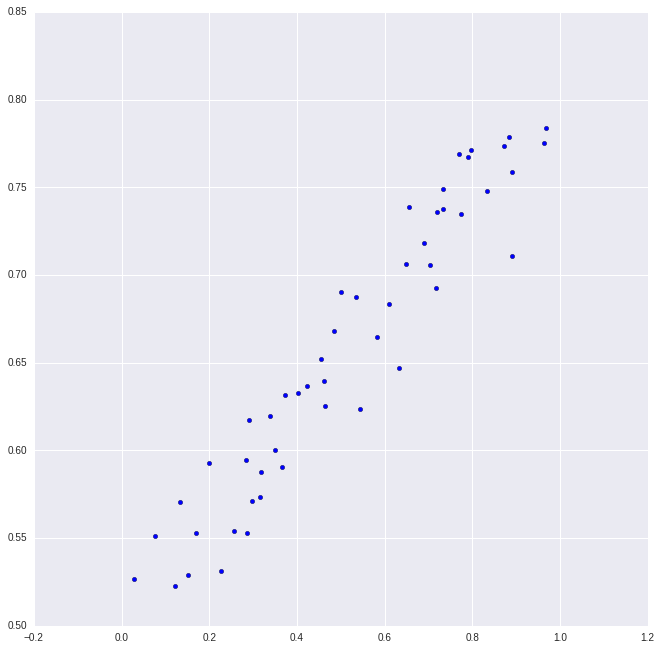

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [12]:
import numpy as np

def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    ys = np.array(ys)
    ps = np.array(ps)
    return np.sqrt(np.average((ys-ps)**2))

Please take a while to (roughly) guess the output before executing the cell below.

In [13]:
l2_loss(ys, ts)

0.023670372229500247

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [14]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

for i in xrange(n_epochs):
    x = np.array(xs)
    y = np.array(ys)
    da = 2.*np.average((a * x + b - y)*x)
    db = 2.*np.average((a * x + b - y)*1.)
    
    a -= da * lr
    b -= db * lr
    
    loss = evaluate(a, b)
    losses.append(loss)
    
    print 'Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b)

Iter:   0 Loss: 0.18617166 a:  0.35795, b:  0.65753
Iter:   1 Loss: 0.05678508 a:  0.25946, b:  0.47344
Iter:   2 Loss: 0.02788531 a:  0.28819, b:  0.52409
Iter:   3 Loss: 0.02419302 a:  0.28138, b:  0.50931
Iter:   4 Loss: 0.02384450 a:  0.28442, b:  0.51282
Iter:   5 Loss: 0.02378340 a:  0.28466, b:  0.51125
Iter:   6 Loss: 0.02374820 a:  0.28562, b:  0.51113
Iter:   7 Loss: 0.02371804 a:  0.28632, b:  0.51064
Iter:   8 Loss: 0.02369100 a:  0.28705, b:  0.51028
Iter:   9 Loss: 0.02366665 a:  0.28772, b:  0.50990
Iter:  10 Loss: 0.02364473 a:  0.28836, b:  0.50956
Iter:  11 Loss: 0.02362499 a:  0.28897, b:  0.50923
Iter:  12 Loss: 0.02360722 a:  0.28955, b:  0.50891
Iter:  13 Loss: 0.02359122 a:  0.29009, b:  0.50862
Iter:  14 Loss: 0.02357682 a:  0.29061, b:  0.50834
Iter:  15 Loss: 0.02356386 a:  0.29111, b:  0.50807
Iter:  16 Loss: 0.02355219 a:  0.29157, b:  0.50782
Iter:  17 Loss: 0.02354169 a:  0.29202, b:  0.50757
Iter:  18 Loss: 0.02353224 a:  0.29244, b:  0.50735
Iter:  19 Lo

RMSE: 0.023456604216
w: [ 0.29762233  0.50453503]


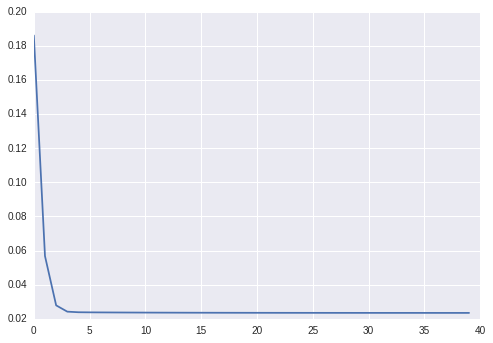

In [15]:
from rmse_regr import RMSERegr

def regr_test(xs, ys):
    regr = RMSERegr()
    xs = np.array(xs).reshape((-1,1))
    xs = np.concatenate((xs, np.ones((xs.shape))), axis=1)
    ys = np.array(ys)
    return regr.regression(xs, ys, [lr] * n_epochs)
    
a, b = regr_test(xs, ys)

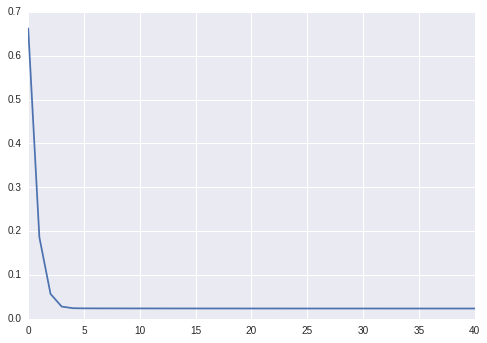

In [19]:
plt.plot(losses)

Let's now visually asses how we do on training data

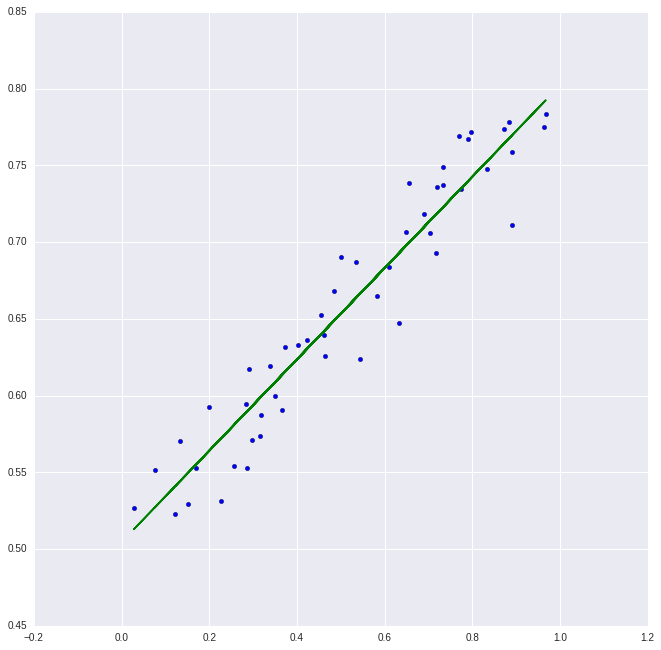

In [20]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

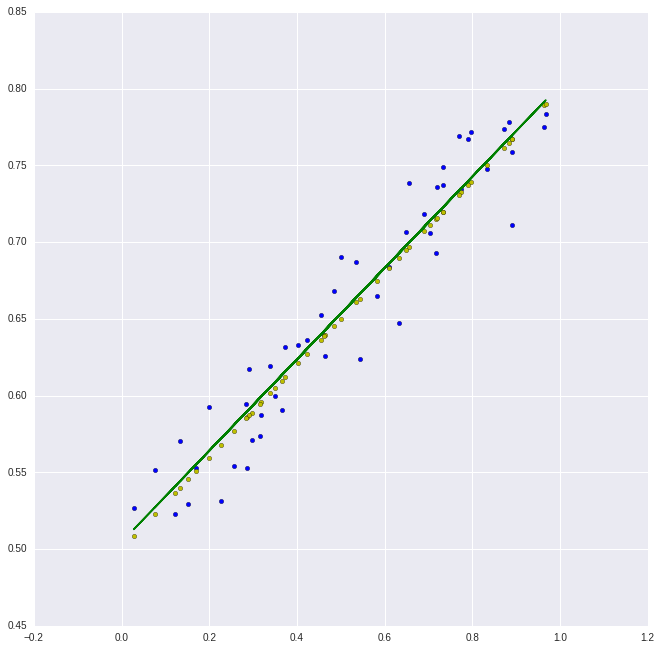

In [21]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.scatter(xs, ts, c='y')
plt.show()

Let's check our implementation vs. the one in sklearn

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print 'Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(
    sk_loss, sk_a, sk_b)

Loss: 0.02344739 a:  0.30017, b:  0.50315
